In [157]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
#from IPython.testing.tools import help_output_test


class down(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, int(round((out_channels+in_channels)/2)), kernel_size=3, padding=1)
        print(self.conv1.weight.shape)
        self.conv2 = nn.Conv2d(int(round((out_channels+in_channels)/2)), out_channels, kernel_size=3, padding=1)
        print(self.conv2.weight.shape)
        
        print(' ')
        
        self.fc1 = nn.Linear(in_features=out_channels*32*32, out_features=240)
        print(self.fc1.weight.shape)
        self.fc2 = nn.Linear(in_features=240, out_features=120)
        print(self.fc2.weight.shape)
        self.fc3 = nn.Linear(in_features=120, out_features=60)
        print(self.fc3.weight.shape)
        self.out = nn.Linear(in_features=60, out_features=10)
        print(self.out.weight.shape)


    def forward(self, t):
        print(t.shape)
        t = F.max_pool2d(t, kernel_size=3, stride=2, padding=1)
        print(t.shape)
        t = self.conv1(t)
        print(t.shape)
        t = F.relu(t)
        print(t.shape)
        #        print(t.shape)

        t = self.conv2(t)
        print(t.shape)
        t = F.relu(t)
        print(t.shape)
        #        print(t.shape)

        return t

In [158]:
network = down(1,6)

torch.Size([4, 1, 3, 3])
torch.Size([6, 4, 3, 3])
 
torch.Size([240, 54])
torch.Size([120, 240])
torch.Size([60, 120])
torch.Size([10, 60])


In [159]:
real_samples_labels = torch.randint(0,100,(1,1,32, 32), dtype=torch.float32)

In [160]:
out = network(real_samples_labels)

torch.Size([1, 1, 32, 32])
torch.Size([1, 1, 16, 16])
torch.Size([1, 4, 16, 16])
torch.Size([1, 4, 16, 16])
torch.Size([1, 6, 16, 16])
torch.Size([1, 6, 16, 16])


In [161]:
print(out.shape)

torch.Size([1, 6, 16, 16])


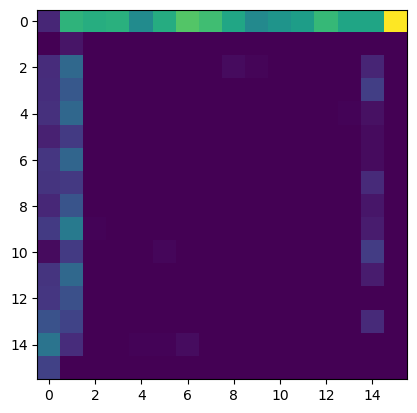

In [162]:
import matplotlib.pyplot as plt
plt.imshow(out[0,0,:,:].detach())